#### Heart Disease Prediction using Neural Networks
##### Table of contents
1-What is Heart Disease?

2-Import packages and libraries

3-Description of the Heart Disease Dataset

4-Load dataset

5-Explore the data (Understanding our data)

6-data visualization

7-data preparation

8-Build model

9-Model summary

10-Model visualization

11-Train the model

12-Test our model (Accuracy and Confusion matrix)

#### What is Heart Disease?
##### Heart disease describes a range of conditions that affect your heart. Heart diseases include:
- Blood vessel disease, such as coronary artery disease
- Heart rhythm problems (arrhythmias)
- Heart defects you're born with (congenital heart defects)
- Heart valve disease
- Disease of the heart muscle
- Heart infection
Many forms of heart disease can be prevented or treated with healthy lifestyle choices

### Import packages and libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from pylab import rcParams
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split 


from keras.models import Sequential
from keras.layers import Dense, ReLU, Dropout

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

### Load dataset

In [34]:
myData = pd.read_csv('heart.csv')

#### Explore the data (Understanding our data)

In [35]:
myData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [36]:
myData.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [37]:
myData.shape

(1025, 14)

In [38]:
myData.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [39]:
myData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Data visualization

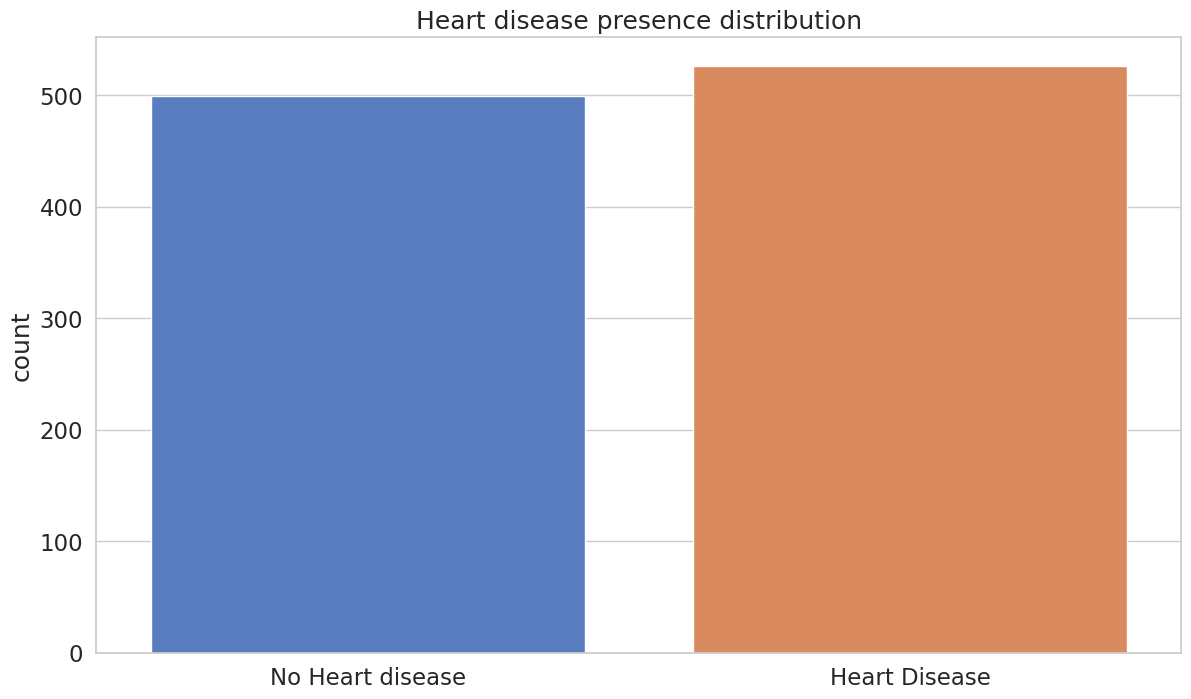

In [40]:
f = sns.countplot(x='target', data=myData)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

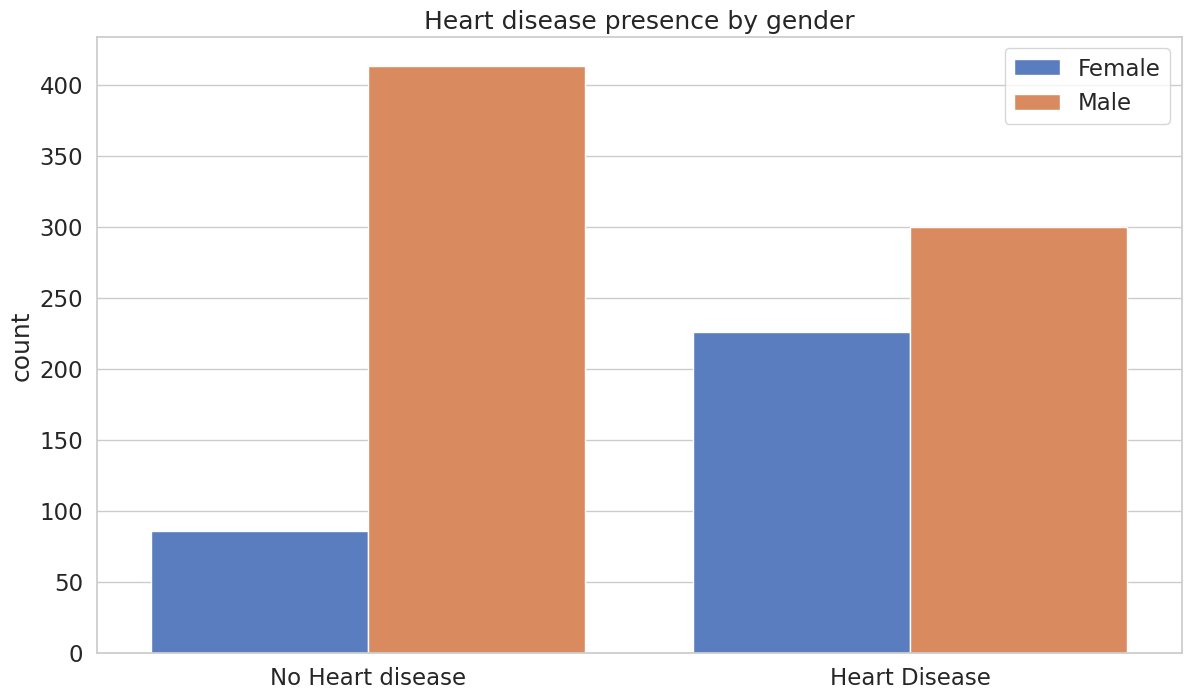

In [41]:
f = sns.countplot(x='target', data=myData, hue='sex')
plt.legend(['Female', 'Male'])
f.set_title("Heart disease presence by gender")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

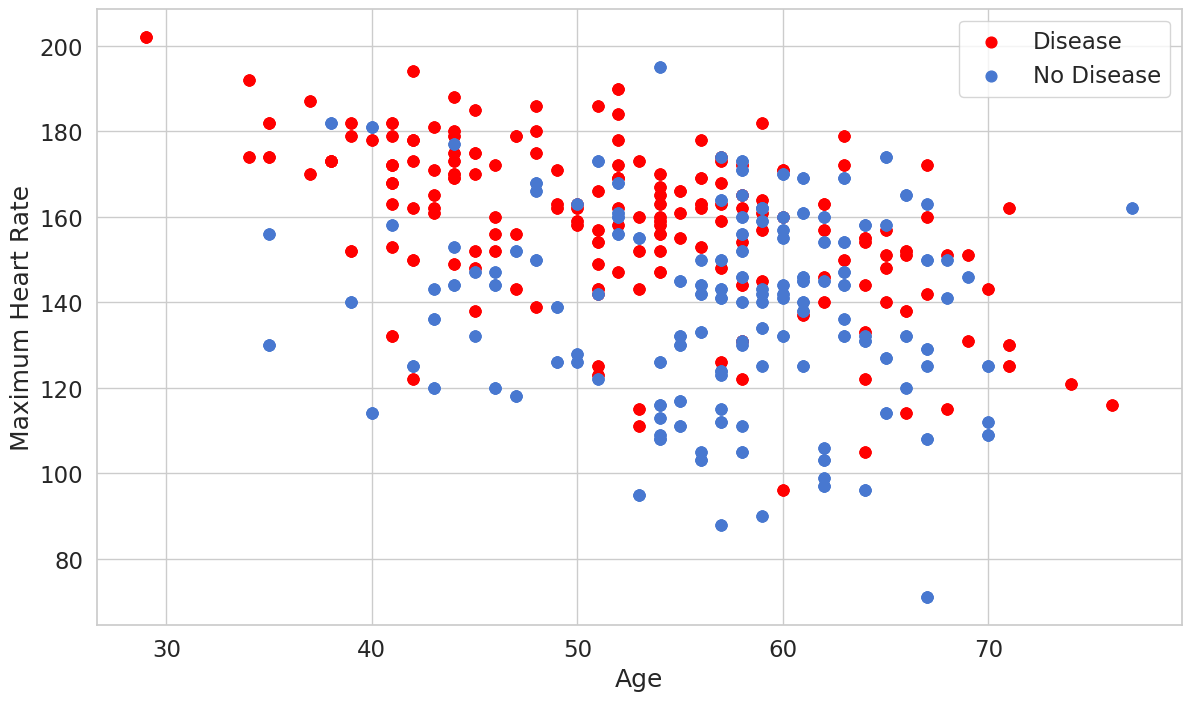

In [42]:
plt.scatter(x=myData.age[myData.target==1], y=myData.thalach[(myData.target==1)], c="red", s=60)
plt.scatter(x=myData.age[myData.target==0], y=myData.thalach[(myData.target==0)], s=60)
plt.legend(["Disease", "No Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate");

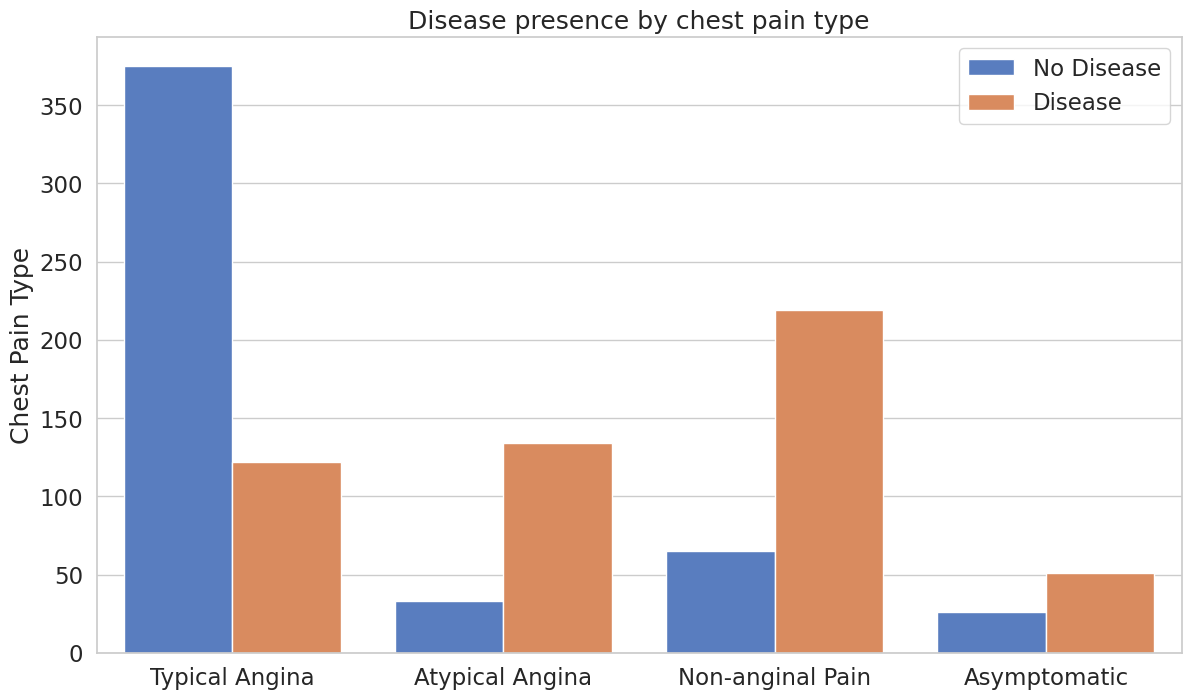

In [43]:
f = sns.countplot(x='cp', data=myData, hue='target')
f.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic']);
f.set_title('Disease presence by chest pain type')
plt.ylabel('Chest Pain Type')
plt.xlabel('')
plt.legend(['No Disease', 'Disease']);

### Data preparation
Prepare the data: Neural networks train much (much, much) quicker on normalized datasets.

In [44]:
# data normalization
myData = (myData - np.min(myData))/(np.max(myData) - np.min(myData))
myData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


In [45]:
#split the data to tain test 
x = myData.drop('target', axis=1)
y = myData['target']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2, random_state=2)

### bulid the model

In [47]:
model = Sequential()
model.add(Dense(100, input_shape=(13,),activation="relu"))
model.add(Dense(units=64, activation='relu')),
model.add(Dropout(rate=0.2)),
model.add(Dense(units=128, activation='relu')),
model.add(Dropout(rate=0.2)),
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='categorical_hinge', metrics=['accuracy'])

### Model summary

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               1400      
                                                                 
 dense_5 (Dense)             (None, 64)                6464      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 16,313
Trainable params: 16,313
Non-trai

### Model visualization

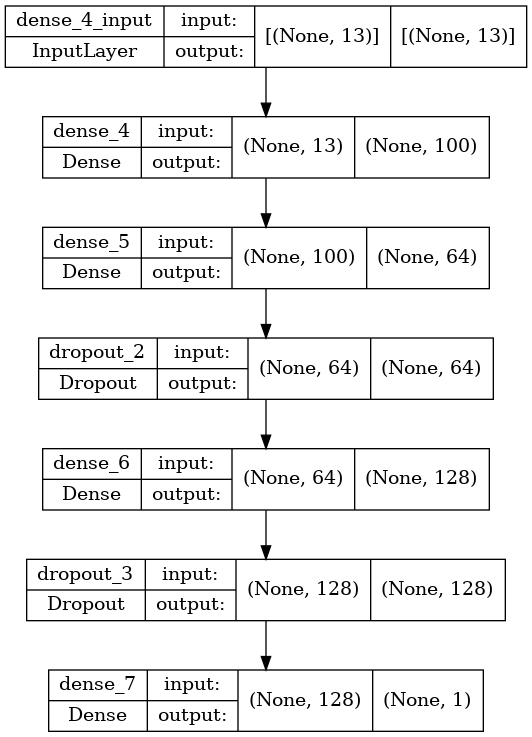

In [50]:
from tensorflow.keras.utils import plot_model

plot_model(model,to_file="Heart Disease Prediction.png",show_shapes=True)

### Train the model

In [51]:
hist=model.fit(X_train, Y_train,validation_data=(X_test, Y_test), epochs=100) 

Epoch 1/100
26/26 [==============================] - 6s 37ms/step - loss: 0.9441 - accuracy: 0.7049 - val_loss: 0.8977 - val_accuracy: 0.7951
Epoch 2/100
26/26 [==============================] - 0s 13ms/step - loss: 0.7914 - accuracy: 0.7890 - val_loss: 0.7365 - val_accuracy: 0.7902
Epoch 3/100
26/26 [==============================] - 0s 14ms/step - loss: 0.6947 - accuracy: 0.8085 - val_loss: 0.7099 - val_accuracy: 0.7951
Epoch 4/100
26/26 [==============================] - 0s 16ms/step - loss: 0.6669 - accuracy: 0.8280 - val_loss: 0.6962 - val_accuracy: 0.8195
Epoch 5/100
26/26 [==============================] - 0s 14ms/step - loss: 0.6446 - accuracy: 0.8476 - val_loss: 0.6805 - val_accuracy: 0.8488
Epoch 6/100
26/26 [==============================] - 0s 8ms/step - loss: 0.6392 - accuracy: 0.8524 - val_loss: 0.6753 - val_accuracy: 0.8390
Epoch 7/100
26/26 [==============================] - 0s 8ms/step - loss: 0.6368 - accuracy: 0.8524 - val_loss: 0.6734 - val_accuracy: 0.8585
Epoch 8/

### Test our model (Accuracy and Confusion matrix)

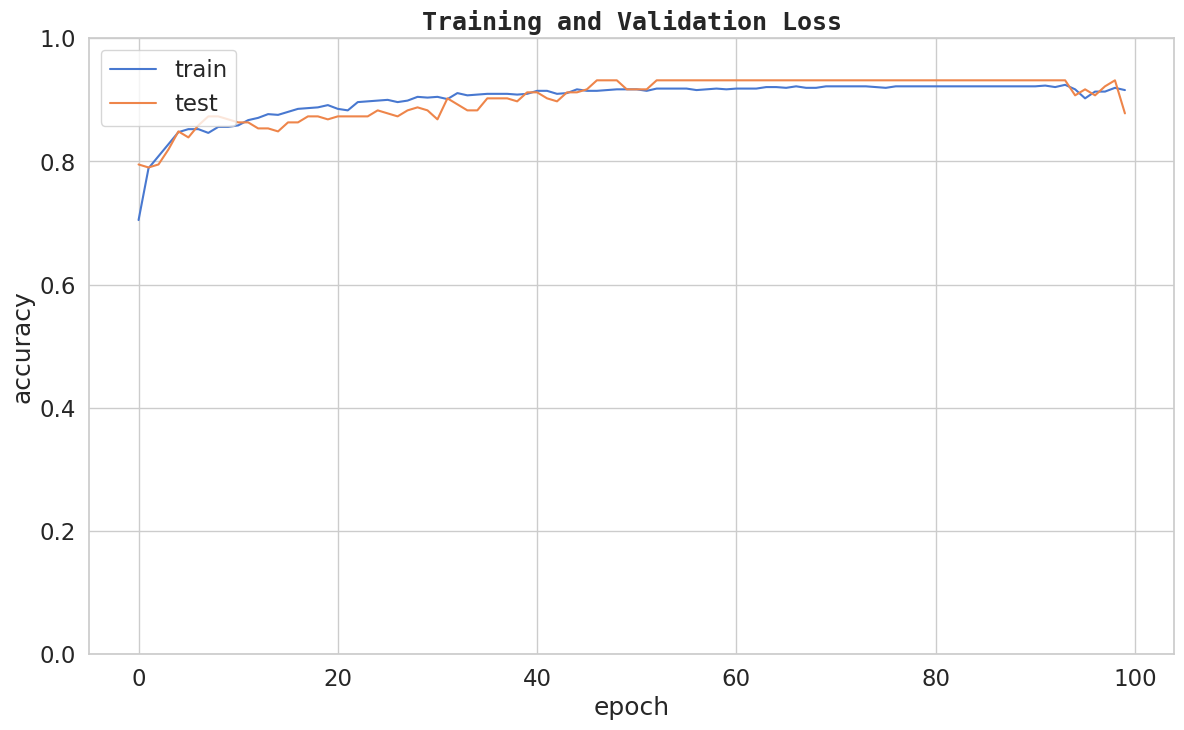

In [52]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Training and Validation Loss',size=18,fontweight='bold',fontname='monospace')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='upper left');

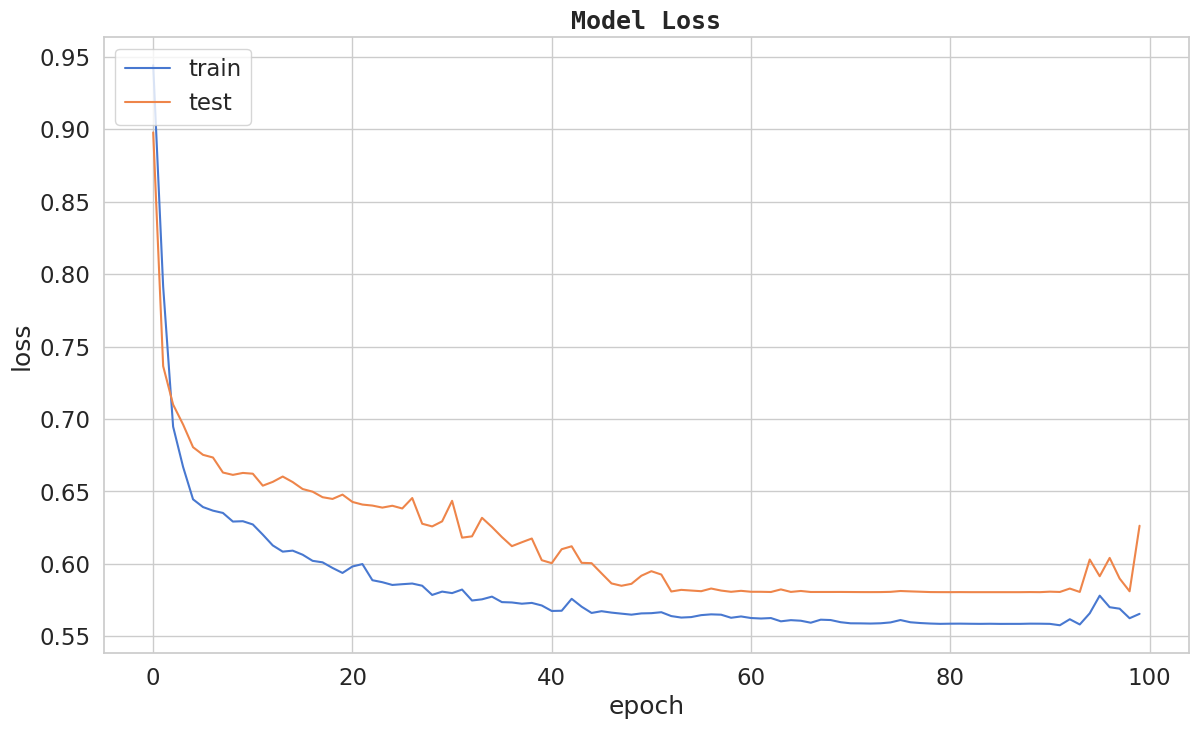

In [53]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss',size=18,fontweight='bold',fontname='monospace')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
y_predicted = (model.predict(X_test) >= 0.5)

In [55]:
import tensorflow as tf
print(classification_report(Y_test.values, y_predicted))

              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87       105
         1.0       0.82      0.97      0.89       100

    accuracy                           0.88       205
   macro avg       0.89      0.88      0.88       205
weighted avg       0.89      0.88      0.88       205



In [56]:
conf_mat = confusion_matrix(Y_test, y_predicted)
print(conf_mat)
total = sum(sum(conf_mat))
sensitivity = conf_mat[0, 0]/(conf_mat[0, 0] + conf_mat[1, 0])
specificity = conf_mat[1, 1]/(conf_mat[1, 1] + conf_mat[0, 1])
accuracy = (conf_mat[0, 0] + conf_mat[1, 1])/total

print('specificity : ', specificity)
print('sensitivity : ', sensitivity)
print('accuracy : ', accuracy)


[[83 22]
 [ 3 97]]
specificity :  0.8151260504201681
sensitivity :  0.9651162790697675
accuracy :  0.8780487804878049


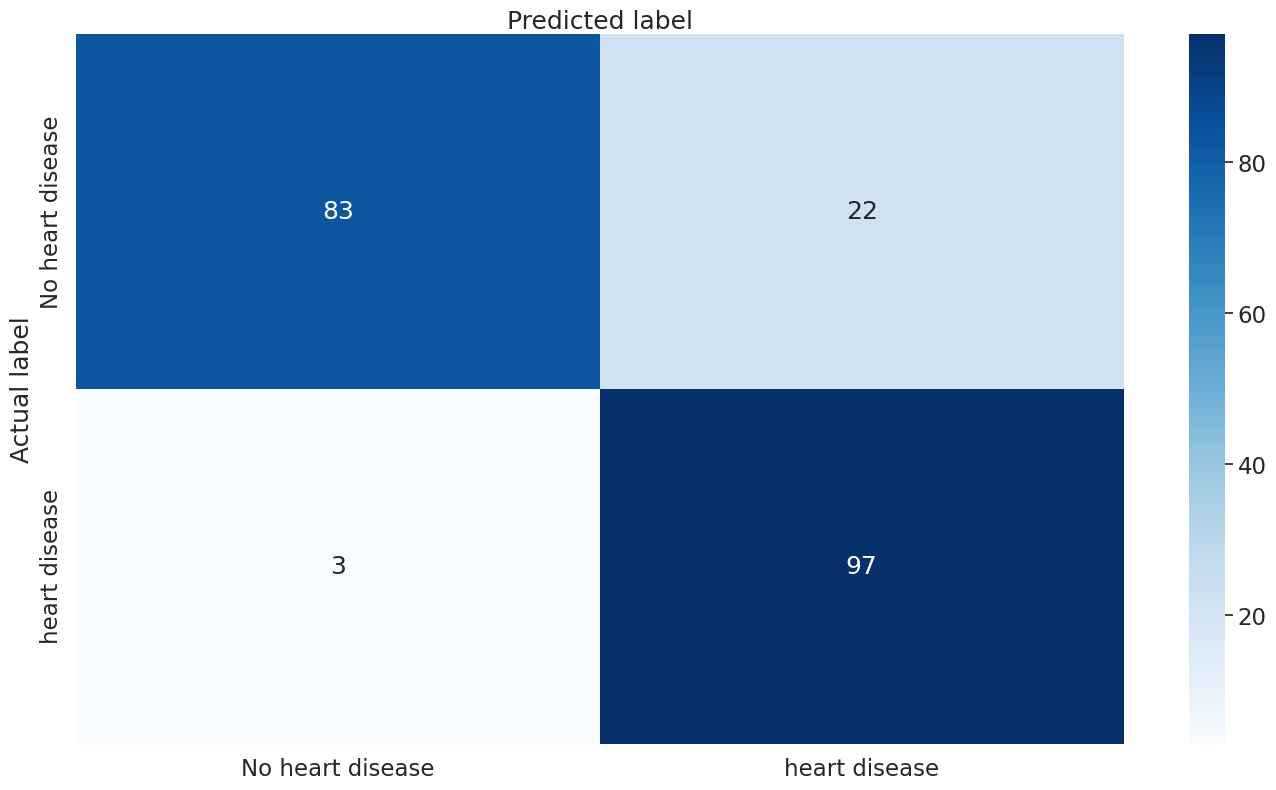

In [57]:
class_names = ["No heart disease","heart disease"]

fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names, )
sns.heatmap(df_cm,annot=True,cmap="Blues",fmt="d")
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label');